In [ ]:
'''Project 3 (KNN(K-Nearest Neighbors)
Problem Statement
Based on reports and some data, build a machine learning KNN model to predict if the person 
is diagnose with Malignant Tumor(MT) or Benign Tumor(BT) ?
'''

In [66]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/breast%20cancer.csv',index_col=0)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.shape

(569, 32)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [8]:
data.isna().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [14]:
data = data.drop('Unnamed: 32',axis = 1)

In [15]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [19]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Seems there is no null values present in our dataset and looks fine to proceed

In [18]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

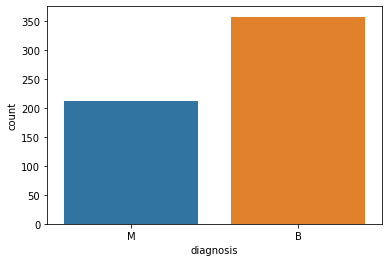

In [22]:
sns.countplot(x='diagnosis', data = data)
plt.show()

Our dataset is not imbalanced, and good to proceed

Now we need to replace the diagnosis value as they are object data type and our machine only understands the binary data i.e. int data type

In [23]:
data['diagnosis'] = data['diagnosis'].replace({'M':1, 'B':0})

In [24]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Now, we will select the best features among all the features using SelectKBest and f_classif

- SelectKBest is the feature selection method.

- f_classif will do the ANOVA test internally.

In [26]:
#Seperating the Features and Labels
x_feature = data.drop('diagnosis',axis = 1)
x_label = data.diagnosis

In [28]:
x_feature.shape

(569, 30)

In [31]:
x_label

id
842302      1
842517      1
84300903    1
84348301    1
84358402    1
           ..
926424      1
926682      1
926954      1
927241      1
92751       0
Name: diagnosis, Length: 569, dtype: int64

In [35]:
best_feature = SelectKBest(score_func = f_classif, k = 17) #k=17, will find the top 17 best features.
fit = best_feature.fit(x_feature,x_label)
data_score = pd.DataFrame(fit.scores_)
data_column = pd.DataFrame(x_feature.columns)

In [38]:
#concate DataFrame
feature_score = pd.concat([data_column, data_score], axis = 1)
feature_score.columns = ['Features', 'Scores']
feature_score.nlargest(17, 'Scores') #.nlargest(17, 'Scores'), will display the dataframe from largest to smallest

,Features,Scores
27,concave points_worst,964.385393
22,perimeter_worst,897.944219
7,concave points_mean,861.676020
20,radius_worst,860.781707
2,perimeter_mean,697.235272
23,area_worst,661.600206
0,radius_mean,646.981021
3,area_mean,573.060747
6,concavity_mean,533.793126
26,concavity_worst,436.691939


Now, we will take this 17 feature in our model, as they are the best features for our model and these are the top 17 features which are correlated with the label.

In [40]:
new_feature = data[['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst', 'compactness_mean', 'compactness_worst', 'radius_se', 'perimeter_se', 'area_se', 'texture_worst', 'smoothness_worst']]
new_feature.shape

(569, 17)

Now, we are going to use StandardScaler on these feature for further.

In [43]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(new_feature)
x_scaled

array([[ 2.29607613,  2.30360062,  2.53247522, ...,  2.48757756,
        -1.35929347,  1.30768627],
       [ 1.0870843 ,  1.53512599,  0.54814416, ...,  0.74240195,
        -0.36920322, -0.37561196],
       [ 1.95500035,  1.34747521,  2.03723076, ...,  1.18133606,
        -0.02397438,  0.52740741],
       ...,
       [ 0.41406869,  0.57900058,  0.10577736, ...,  0.1806983 ,
         1.37485378, -0.80958728],
       [ 2.28998549,  2.30360062,  2.65886573, ...,  1.0095027 ,
         2.23792588,  1.43042677],
       [-1.74506282, -1.43273495, -1.26181958, ..., -0.46615196,
         0.76418957, -1.85901852]])

So we got the Standard Scaled values for our feature.

# - Training The Model

In [45]:
#Using train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled, x_label, test_size = 0.25, random_state = 90)

**-Model Instantiating & Trainning**

In [47]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

Now, Our model is trained and ready to Predict

In [49]:
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

**As the KNN is also known as lazy learner, so just for information lets see the time it will take while training and testing.**

In [54]:
from time import time
start = time()
knn.fit(x_train,y_train)
print('KNN Trainig Time : ', (time()-start))

KNN Trainig Time :  0.002435922622680664


In [55]:
start = time()
y_pred = knn.predict(x_test)
print('KNN Testing Time : ', (time()-start))

KNN Testing Time :  0.017561912536621094


We can see that KNN is lazy learner.

**-Now, Lets create a confusion matrix..**

In [56]:
cfm = confusion_matrix(y_test, y_pred)
cfm

array([[90,  1],
       [ 5, 47]])

So, we got 1 False Positive (FP) and 5 False Negative (FN) and its looks good.

**Now, We will see the classification report, where we will get every score in one go.**

In [58]:
print(classification_report(y_test, y_pred, digits = 2))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        91
           1       0.98      0.90      0.94        52

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



**So, as we see in our classification report we got 96% of accuracy for our model**

**-Cross Validation Score**

In [64]:
#To check if our model is overfitting
cross_val_score(knn, x_scaled, x_label, cv = 10)

array([0.98245614, 0.94736842, 0.94736842, 0.98245614, 0.96491228,
       1.        , 0.96491228, 1.        , 0.96491228, 0.96428571])

In [65]:
cross_val_score(knn, x_scaled, x_label, cv = 10).mean()

0.9718671679197994

So our Accuracy is 97%

**-Hyperparameter Tuning**

Lets use GridSearchCV for the best parameter to improve the model accuracy..

In [67]:
paramgrid = {'algorithm' : ['kd-tree','brute'],
             'leaf_size' : [3,5,6,7,8],
             'n_neighbors' : [3,5,7,9,11,13]
            }

These are the Parameter used for KNN 

In [69]:
grid = GridSearchCV(estimator = knn, param_grid = paramgrid)
grid.fit(x_train,y_train)
grid.best_params_

{'algorithm': 'brute', 'leaf_size': 3, 'n_neighbors': 3}

So, we find these parameter as the best parameter for our model.

**-Instantiating the best parameters to our model**

In [70]:
knn = KNeighborsClassifier(algorithm = 'brute', leaf_size = 3, n_neighbors = 3)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=3, n_neighbors=3)

In [77]:
y_preds = knn.predict(x_test)
y_preds

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [78]:
cfm = confusion_matrix(y_test,y_preds)
cfm

array([[89,  2],
       [ 4, 48]])

This is the confusion matrix for the parameter we use.

In [79]:
print(classification_report(y_test, y_pred, digits = 2))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        91
           1       0.96      0.92      0.94        52

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



**So, This is the classification report after Hyperparameter Tuning and we still got the same accuracy for our model, it means that this is the perfect accuracy of our model.**


**Our Model Accuracy : 96%**